<h1><center> SVM : </center></h1>

## Import Libraries :

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## Application du SVM après SMOTE

In [9]:
# Import data
data_train_SMOTE = pd.read_csv("train_smote.csv")
data_test = pd.read_csv("test.csv")

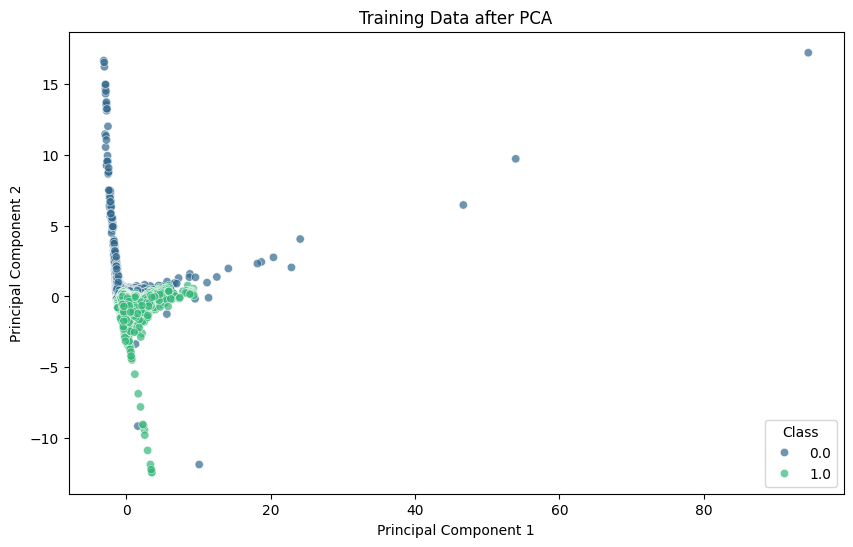

In [10]:
# Charger votre dataset
# Variables explicatives (X) et variable cible (y)
X_train = data_train_SMOTE.drop('outcome', axis=1)  # Exclure la colonne 'outcome'
y_train = data_train_SMOTE['outcome']

X_test = data_test.drop('outcome', axis=1)  # Exclure la colonne 'outcome'
y_test = data_test['outcome']


# Normalisation des données
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)



# Réduire la dimension avec PCA
pca = PCA(n_components=2)  # Choisissez le nombre de composantes souhaité
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)
# Créer un DataFrame avec les composantes principales et les classes réelles
train_df = pd.DataFrame({'PC1': X_train_pca[:, 0], 'PC2': X_train_pca[:, 1], 'Class': y_train})

# Tracer le graphique de dispersion avec les classes réelles
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=train_df, palette='viridis', edgecolor='w', alpha=0.7)

# Ajouter des étiquettes et une légende
plt.title('Training Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')

# Afficher le graphique
plt.show()



### Utilisation de la validation croisée pour optimiser les hyper-paramétres du modèle

In [11]:
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à rechercher
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 'scale', 'auto'], 'kernel': ['linear', 'rbf']}

# Initialiser le modèle SVM
svm_model = SVC()

# Initialiser GridSearchCV avec le modèle SVM et la grille des hyperparamètres
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Entraîner le modèle sur l'ensemble d'entraînement avec recherche d'hyperparamètres
grid_search.fit(X_train_pca, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Prédire les résultats sur l'ensemble de test avec les meilleurs hyperparamètres
y_pred = grid_search.predict(X_test_pca)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy avec les meilleurs hyperparamètres: {accuracy:.2f}')

# Afficher le rapport de classification
print('\nClassification Report avec les meilleurs hyperparamètres:')
print(classification_report(y_test, y_pred))

Meilleurs hyperparamètres: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy avec les meilleurs hyperparamètres: 0.82

Classification Report avec les meilleurs hyperparamètres:
              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90       383
         1.0       0.17      0.65      0.27        20

    accuracy                           0.82       403
   macro avg       0.57      0.74      0.58       403
weighted avg       0.94      0.82      0.87       403



### Evaluation du modèle

In [13]:
# Initialiser le modèle SVM
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
#svm_model = SVC(kernel='linear')
svm_model = SVC(C=10, gamma= 1, kernel= 'rbf')

# Entraîner le modèle sur l'ensemble d'entraînement
svm_model.fit(X_train_pca, y_train)

# Prédire les résultats sur l'ensemble de test
y_pred = svm_model.predict(X_test_pca)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculer AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)
print(f'AUC-ROC:{auc_roc:.2f}')

#Calculer Ballanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'balanced_accuracy:{balanced_accuracy:.2f}')


# Afficher le rapport de classification
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.82
AUC-ROC:0.74
balanced_accuracy:0.74

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90       383
         1.0       0.17      0.65      0.27        20

    accuracy                           0.82       403
   macro avg       0.57      0.74      0.58       403
weighted avg       0.94      0.82      0.87       403



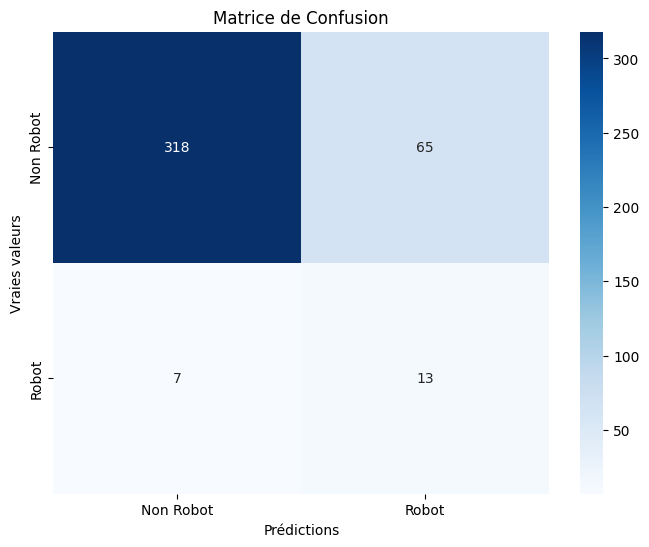

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Robot', 'Robot'], yticklabels=['Non Robot', 'Robot'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions  # Assurez-vous d'avoir mlxtend installé (pip install mlxtend)

# ...

# Tracer le graphique de dispersion avec la frontière de décision
plt.figure(figsize=(10, 6))

# Tracer les points d'entraînement
scatter = plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, marker='o', edgecolors='k')

# Tracer les points de test
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, marker='x', edgecolors='k', alpha=0.6)

# Tracer la frontière de décision
plot_decision_regions(np.array(X_train), np.array(y_train), clf=svm_model, legend=1)

# Ajouter des étiquettes et une légende
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Afficher la légende
plt.legend(*scatter.legend_elements(), title='Classes')

# Afficher le graphique
plt.show()


### Application du SVM avant SMOTE


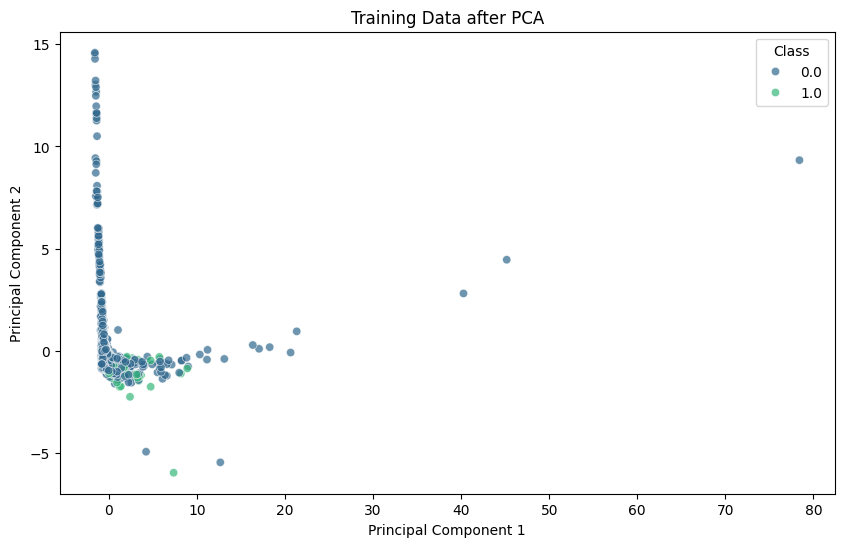

In [2]:
# Import data
data_train = pd.read_csv("/content/train.csv")
data_test = pd.read_csv("/content/test.csv")


# Charger votre dataset
# Variables explicatives (X) et variable cible (y)
X_train = data_train.drop('outcome', axis=1)  # Exclure la colonne 'outcome'
y_train = data_train['outcome']

X_test = data_test.drop('outcome', axis=1)  # Exclure la colonne 'outcome'
y_test = data_test['outcome']


# Normalisation des données
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)



# Réduire la dimension avec PCA
pca = PCA(n_components=2)  # Choisissez le nombre de composantes souhaité
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)
# Créer un DataFrame avec les composantes principales et les classes réelles
train_df = pd.DataFrame({'PC1': X_train_pca[:, 0], 'PC2': X_train_pca[:, 1], 'Class': y_train})

# Tracer le graphique de dispersion avec les classes réelles
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=train_df, palette='viridis', edgecolor='w', alpha=0.7)

# Ajouter des étiquettes et une légende
plt.title('Training Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')

# Afficher le graphique
plt.show()

#### Evaluation du modèle :

In [3]:
# Initialiser le modèle SVM
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
#svm_model = SVC(kernel='linear')
svm_model = SVC(C=10, gamma= 1, kernel= 'rbf')

# Entraîner le modèle sur l'ensemble d'entraînement
svm_model.fit(X_train_pca, y_train)

# Prédire les résultats sur l'ensemble de test
y_pred = svm_model.predict(X_test_pca)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculer AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred)
print(f'AUC-ROC:{auc_roc:.2f}')

#Calculer Ballanced Accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'balanced_accuracy:{balanced_accuracy:.2f}')


# Afficher le rapport de classification
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       383
         1.0       0.50      0.10      0.17        20

    accuracy                           0.95       403
   macro avg       0.73      0.55      0.57       403
weighted avg       0.93      0.95      0.93       403



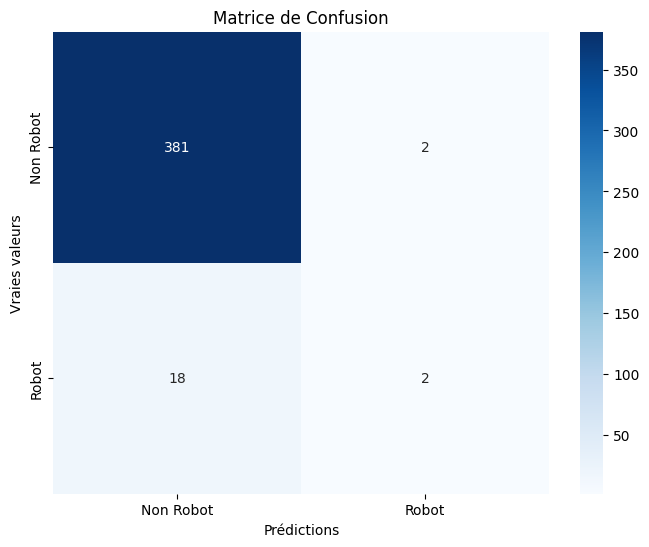

In [4]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Créer un heatmap de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Robot', 'Robot'], yticklabels=['Non Robot', 'Robot'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()
